In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [2]:

url = "https://www.basketball-reference.com/leagues/NBA_2020_standings.html"

html = urlopen(url)

soup = BeautifulSoup(html)

In [7]:
#soup.findAll('tr', limit=2)

headers1 = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
headers2 = [th.getText() for th in soup.findAll('tr', limit=20)[17].findAll('th')]
#headers3 = [th.getText() for th in soup.findAll('tr', limit=50)[34].findAll('th')]
#headers4 = [th.getText() for th in soup.findAll('tr', limit=70)[53].findAll('th')]

#headers = headers1[0:]
headers = headers1[1:]

headers

['W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']

In [9]:
rows = soup.findAll('tr')[1:]

team_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]



team_stats[1:16]

[['53', '12', '.815', '—', '118.6', '107.4', '10.42'],
 ['46', '18', '.719', '6.5', '113.0', '106.5', '5.84'],
 ['42', '21', '.667', '10.0', '113.0', '106.8', '5.68'],
 ['41', '23', '.641', '11.5', '112.4', '108.9', '2.86'],
 ['39', '25', '.609', '13.5', '109.3', '107.3', '1.57'],
 ['38', '26', '.594', '14.5', '109.4', '107.4', '2.04'],
 ['29', '34', '.460', '23.0', '110.9', '111.6', '-1.37'],
 ['29', '35', '.453', '23.5', '106.2', '107.2', '-0.93'],
 ['23', '40', '.365', '29.0', '115.5', '119.7', '-4.95'],
 ['22', '42', '.344', '30.5', '102.8', '109.8', '-7.20'],
 ['21', '43', '.328', '31.5', '106.8', '110.0', '-3.86'],
 ['20', '44', '.313', '32.5', '105.2', '111.8', '-6.56'],
 ['20', '45', '.308', '33.0', '107.3', '110.6', '-4.08'],
 ['20', '46', '.303', '33.5', '111.5', '119.5', '-7.53'],
 ['19', '45', '.297', '33.5', '107.0', '114.9', '-7.56']]

In [11]:
df_east = pd.DataFrame(team_stats[1:16], columns = headers)
df_east

,W,L,W/L%,GB,PS/G,PA/G,SRS
0,53,12,.815,—,118.6,107.4,10.42
1,46,18,.719,6.5,113.0,106.5,5.84
2,42,21,.667,10.0,113.0,106.8,5.68
3,41,23,.641,11.5,112.4,108.9,2.86
4,39,25,.609,13.5,109.3,107.3,1.57
5,38,26,.594,14.5,109.4,107.4,2.04
6,29,34,.460,23.0,110.9,111.6,-1.37
7,29,35,.453,23.5,106.2,107.2,-0.93
8,23,40,.365,29.0,115.5,119.7,-4.95
9,22,42,.344,30.5,102.8,109.8,-7.20


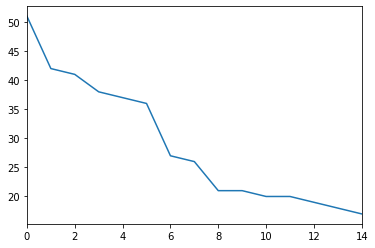

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

df['W'].astype(str).astype(int).plot()
